✅ Spectrograms sorted into storm/ and quiet/ folders.
Found 115 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


C:\Users\User\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\User\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8708 - loss: 0.4821 - val_accuracy: 0.9643 - val_loss: 0.8148
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9624 - loss: 0.6594 - val_accuracy: 0.9643 - val_loss: 0.3618
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9345 - loss: 0.4393 - val_accuracy: 0.9643 - val_loss: 0.1646
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9662 - loss: 0.1197 - val_accuracy: 0.9643 - val_loss: 0.2418
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 999ms/step - accuracy: 0.9495 - loss: 0.1198 - val_accuracy: 0.9643 - val_loss: 0.2867
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9594 - loss: 0.2183 - val_accuracy: 0.9643 - val_loss: 0.1792
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9648 - loss: 0.0996 - val_accuracy: 0.9643 - val_loss: 0.2502
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9651 - loss: 0.1455 - val_accuracy: 0.9643 - val_loss: 0.1608
Epoch 9/10

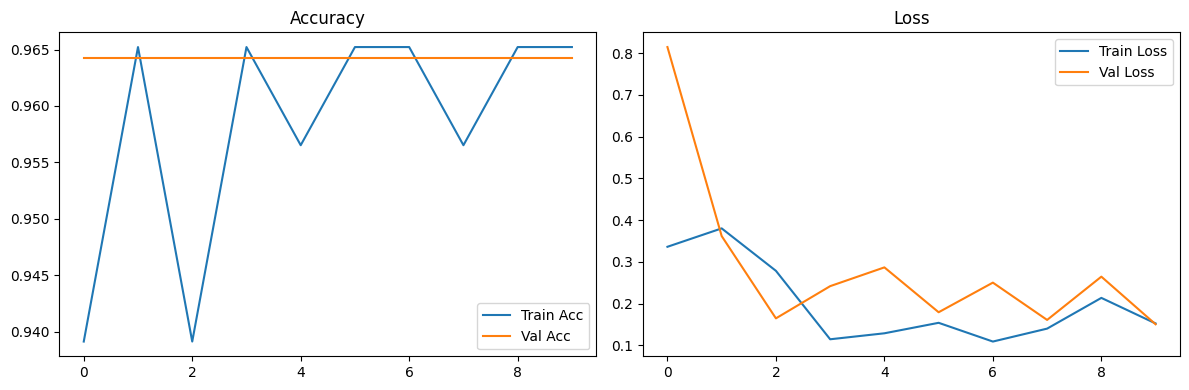

Model saved as wavelet_cnn_model.h5


In [2]:
# WaveletCNN.ipynb
# This notebook builds a CNN to classify spectrograms as storm/non-storm (placeholder logic)

import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Parameters
image_dir = r"G:\Το Drive μου\PhD\PhdRelated\ML\WaveletAnalysis\daily_spectrograms"
label_dir = r"G:\Το Drive μου\PhD\PhdRelated\ML\WaveletAnalysis\labels"
img_height, img_width = 256, 256
batch_size = 16
epochs = 10

# Step 0: Organize images based on labels
storm_file = os.path.join(label_dir, "storm_days.csv")
quiet_file = os.path.join(label_dir, "quiet_days.csv")

storm_days = pd.read_csv(storm_file, header=None)[0].tolist()
quiet_days = pd.read_csv(quiet_file, header=None)[0].tolist()

storm_dir = os.path.join(image_dir, "storm")
quiet_dir = os.path.join(image_dir, "quiet")
os.makedirs(storm_dir, exist_ok=True)
os.makedirs(quiet_dir, exist_ok=True)

for date in storm_days:
    fname = f"spectrogram_{date}.png"
    src = os.path.join(image_dir, fname)
    dst = os.path.join(storm_dir, fname)
    if os.path.exists(src):
        shutil.move(src, dst)

for date in quiet_days:
    fname = f"spectrogram_{date}.png"
    src = os.path.join(image_dir, fname)
    dst = os.path.join(quiet_dir, fname)
    if os.path.exists(src):
        shutil.move(src, dst)

print("✅ Spectrograms sorted into storm/ and quiet/ folders.")

# 1. Load images from directory (we assume subfolders storm/ and quiet/ with images)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    image_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# 2. Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# 4. Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# 5. Save model
model.save("wavelet_cnn_model.h5")
print("Model saved as wavelet_cnn_model.h5")